<a href="https://colab.research.google.com/github/Sanjaycsk/AirBnb-EDA/blob/main/AirBnB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [3]:
# pip install git+git://github.com/geopandas/geopandas.git

In [100]:
# pip install geopandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from matplotlib.dates import date2num
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
airbnb_file = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Projects /Capstone/Data analysis /AirBnb/Airbnb NYC 2019.csv")

In [7]:
airbnb_file.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Let's Start with Data Cleaning. 

In [8]:
#let's first check with the size of the dataset. 
airbnb_file.shape

(48895, 16)

In [9]:
# Let's get information about over all data set 
airbnb_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Above Information tells us that there are no Null data available in all the rows exculding Last_review and reviews_per_month. In this rows it's most likely to have null values in case if there are no reviews given the Host. 



In [10]:
#Duplicates in ID. 
id_duplicates = len(pd.unique(airbnb_file['id']))

print(f"No.of.unique values :{id_duplicates}")

#This tells there are no Duplicates in ID .  

No.of.unique values :48895


In [11]:
#Duplicates in Names 
name_dup = len(pd.unique(airbnb_file['name']))
print(f'No.of.unique values : {name_dup}')



No.of.unique values : 47906


In [12]:
#This shows there are few names are repeated with diffrent Id's (Let's say name Host name from Diffrent Host), Now let's find Them 


In [13]:
repeated_names = id_duplicates - name_dup
print(f'No.of Reapted names : {repeated_names}')
# This show 989 names have same name as Others but has diffrent unique Id. 
#So futher analysis should be based on Id to avoid confusions about repeating names. Also Let's Just Check Out Top 10 repeated names

No.of Reapted names : 989


In [14]:
Top_Ten_Host_with_same_name = airbnb_file['name'].value_counts(ascending=False)


In [15]:
Top_Ten_Host_with_same_name.head(10)

Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Private Room                                  11
Loft Suite @ The Box House Hotel              11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Private room in Williamsburg                   8
Beautiful Brooklyn Brownstone                  8
Name: name, dtype: int64

In [16]:
# this are Top 10 repeated named.  

In [17]:
airbnb_file.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [18]:
#Duplicates in ID. 
host_id_duplicates = len(pd.unique(airbnb_file['host_id']))

print(f"No.of.unique values :{host_id_duplicates}")

#This tells there are no Duplicates in ID .  

No.of.unique values :37457


In [19]:
#Duplicates in Names 
host_name_dup = len(pd.unique(airbnb_file['host_name']))
print(f'No.of.unique values : {host_name_dup}')

No.of.unique values : 11453


In [20]:
repeated_host_names = host_id_duplicates - host_name_dup
print(f'No.of Reapted Host names : {repeated_host_names}')
# This show 989 names have same name as Others but has diffrent unique Id. 
#So futher analysis should be based on Id to avoid confusions about repeating names. Also Let's Just Check Out Top 10 repeated names

No.of Reapted Host names : 26004


In [21]:
#Time to find the Host id and name times, Well we already have calculated host listing count, 
#So we just need to Verify if no of duplicates and calculated host listing count are same then no need to do Futher analysis on this. 

In [22]:
Top_Host_ID_counts = airbnb_file[['host_id']].value_counts(ascending=False).to_frame()
Top_Host_ID_counts.head()

,0
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96


In [23]:
pd.unique(airbnb_file['calculated_host_listings_count'])


array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

In [24]:
#Top 10 neighbourhood From each Neighbourhood GROUP 
# airbnb_file.groupby(['neighbourhood_group', 'neighbourhood']
airbnb_file.groupby(['neighbourhood_group'])['neighbourhood'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

In [25]:
# nieghbourhood_groupby2

In [26]:
multi_group_var = airbnb_file[['neighbourhood_group','neighbourhood']].groupby(['neighbourhood_group','neighbourhood'])['neighbourhood'].count().reset_index(name='count').sort_values(['neighbourhood_group','count'], ascending=[False,False])


In [27]:
#Top 5 
multi_group_var

,neighbourhood_group,neighbourhood,count
212,Staten Island,St. George,48
215,Staten Island,Tompkinsville,42
213,Staten Island,Stapleton,27
184,Staten Island,Concord,26
179,Staten Island,Arrochar,21
...,...,...,...
25,Bronx,Mount Eden,6
29,Bronx,Olinville,4
37,Bronx,Spuyten Duyvil,4
8,Bronx,Co-op City,2


In [28]:
Unique_neighbourhood_group = pd.unique(airbnb_file['neighbourhood_group']).tolist()
i =1
for each_neighbourhood_group in Unique_neighbourhood_group:
  each_neighbourhood_group = str(each_neighbourhood_group)
  print(each_neighbourhood_group)
  i=i+1
  rslt_df = multi_group_var.loc[multi_group_var['neighbourhood_group'] == each_neighbourhood_group ] 
  # print(rslt_df.head())
  

# rslt_df = dataframe[dataframe['Percentage'] > 80]

Brooklyn
Manhattan
Queens
Staten Island
Bronx


In [29]:
Unique_neighbourhood_group

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [30]:
Brooklyn_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Brooklyn' ] 
Brooklyn_neighbourhood_top10.head(10)

,neighbourhood_group,neighbourhood,count
93,Brooklyn,Williamsburg,3920
50,Brooklyn,Bedford-Stuyvesant,3714
58,Brooklyn,Bushwick,2465
65,Brooklyn,Crown Heights,1564
78,Brooklyn,Greenpoint,1115
72,Brooklyn,Flatbush,621
61,Brooklyn,Clinton Hill,572
86,Brooklyn,Prospect-Lefferts Gardens,535
84,Brooklyn,Park Slope,506
70,Brooklyn,East Flatbush,500


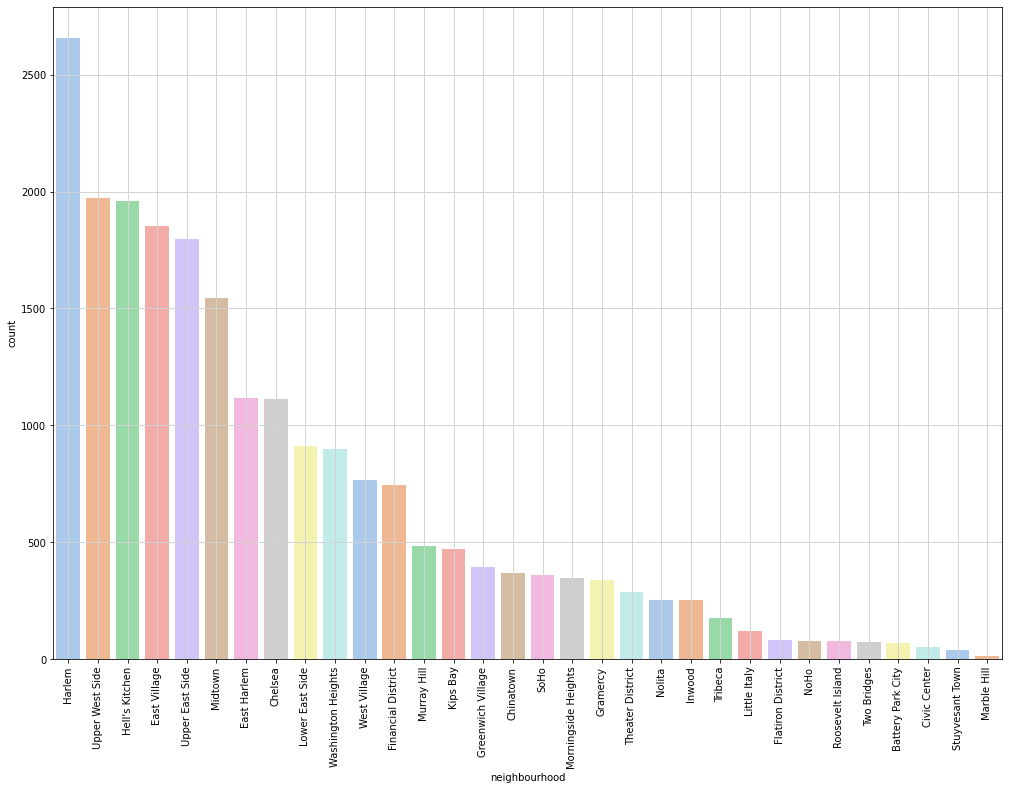

In [31]:
Manhattan_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Manhattan' ] 
plt.figure(figsize=(17,12))
Manhattan_neighbourhood_top10 = Manhattan_neighbourhood_top10.sort_values('count' ,ascending= False)
ax = sns.barplot(x="neighbourhood", y="count", data=Manhattan_neighbourhood_top10, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)

plt.show()

In [32]:
No_of_Neighbourhood_in_Manhattan = len(pd.unique(Manhattan_neighbourhood_top10['neighbourhood']))
print(f'No.of.unique neighbourhood in Manhattan: {No_of_Neighbourhood_in_Manhattan}')
print("Top 10 count's in Manhattan neighbourhood are:")
Manhattan_neighbourhood_top10.head(10)

No.of.unique neighbourhood in Manhattan: 32
Top 10 count's in Manhattan neighbourhood are:


,neighbourhood_group,neighbourhood,count
105,Manhattan,Harlem,2658
124,Manhattan,Upper West Side,1971
106,Manhattan,Hell's Kitchen,1958
100,Manhattan,East Village,1853
123,Manhattan,Upper East Side,1798
112,Manhattan,Midtown,1545
99,Manhattan,East Harlem,1117
96,Manhattan,Chelsea,1113
110,Manhattan,Lower East Side,911
125,Manhattan,Washington Heights,899


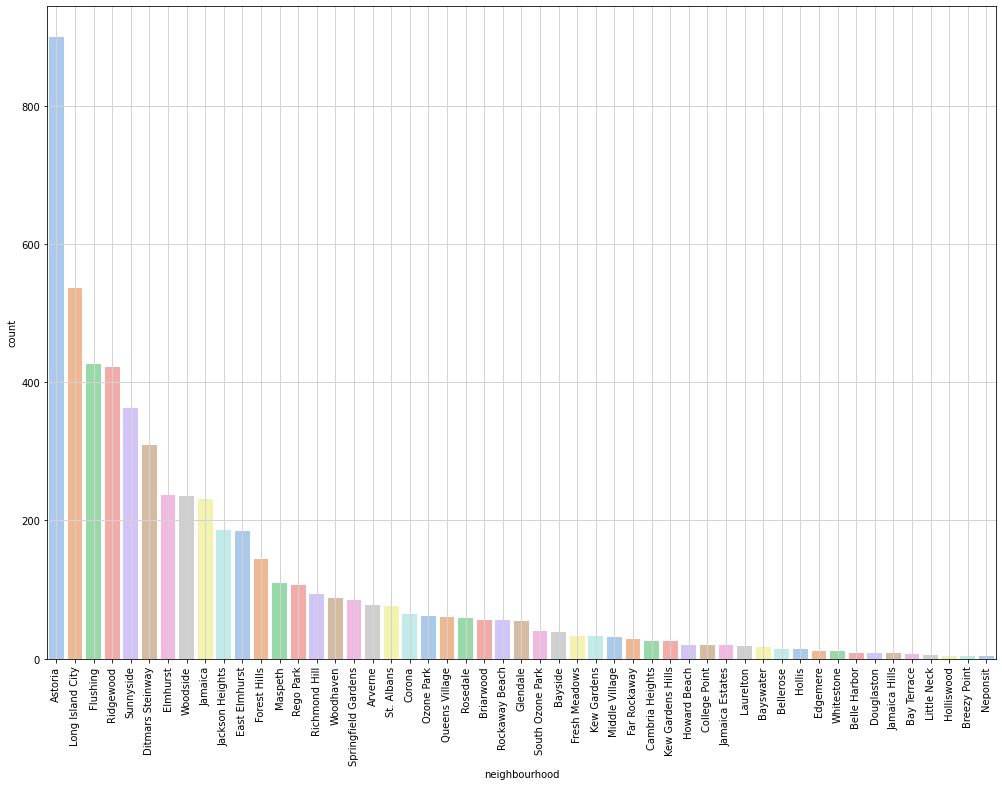

In [33]:
Queens_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Queens' ] 
plt.figure(figsize=(17,12))
Queens_neighbourhood_top10 = Queens_neighbourhood_top10.sort_values('count' ,ascending= False)
ax = sns.barplot(x="neighbourhood", y="count", data=Queens_neighbourhood_top10, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

In [34]:
No_of_Neighbourhood_in_Queens = len(pd.unique(Queens_neighbourhood_top10['neighbourhood']))
print(f'No.of.unique neighbourhood in Queens: {No_of_Neighbourhood_in_Queens}')
print("Top 10 count's in Queens neighbourhood are:")
Queens_neighbourhood_top10.head(10)

No.of.unique neighbourhood in Queens: 51
Top 10 count's in Queens neighbourhood are:


,neighbourhood_group,neighbourhood,count
128,Queens,Astoria,900
160,Queens,Long Island City,537
145,Queens,Flushing,426
168,Queens,Ridgewood,423
174,Queens,Sunnyside,363
139,Queens,Ditmars Steinway,309
143,Queens,Elmhurst,237
177,Queens,Woodside,235
153,Queens,Jamaica,231
152,Queens,Jackson Heights,186


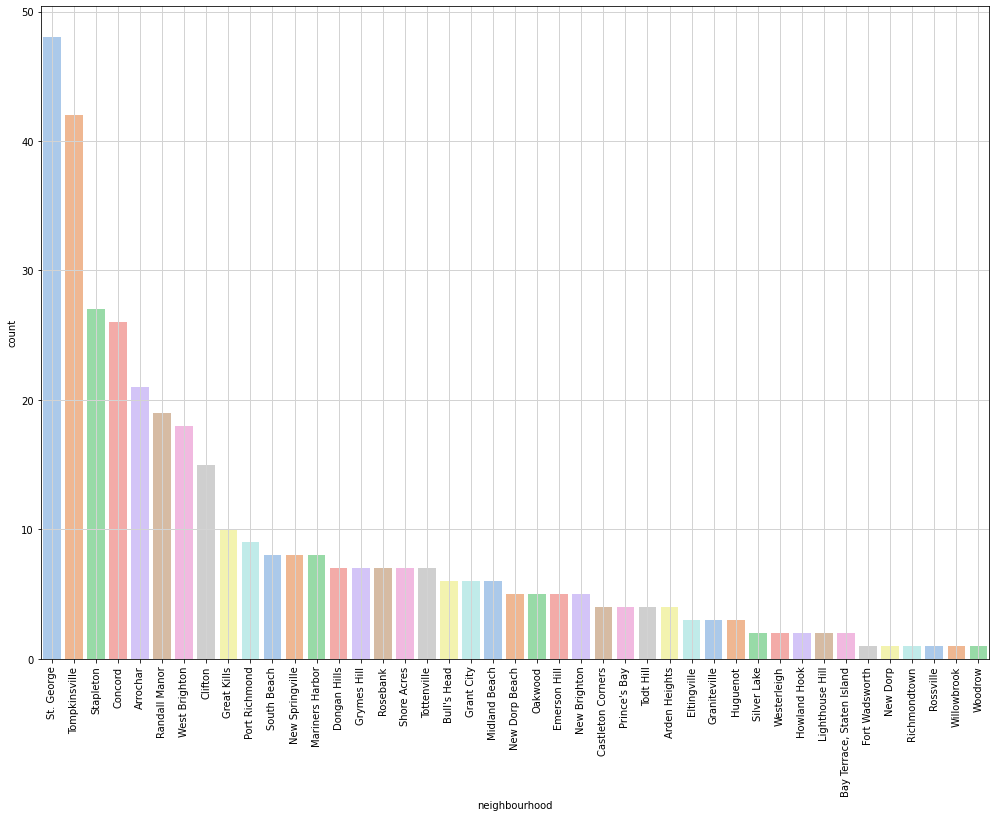

In [35]:
Staten_Island_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Staten Island' ] 
plt.figure(figsize=(17,12))
Staten_Island_neighbourhood_top10 = Staten_Island_neighbourhood_top10.sort_values('count' ,ascending= False)
ax = sns.barplot(x="neighbourhood", y="count", data=Staten_Island_neighbourhood_top10, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

In [36]:
No_of_Neighbourhood_in_Staten_Island = len(pd.unique(Staten_Island_neighbourhood_top10['neighbourhood']))
print(f'No.of.unique neighbourhood in Staten_Island: {No_of_Neighbourhood_in_Staten_Island}')
print("Top 10 count's in Staten_Island neighbourhood are:")
Staten_Island_neighbourhood_top10.head(10)

No.of.unique neighbourhood in Staten_Island: 43
Top 10 count's in Staten_Island neighbourhood are:


,neighbourhood_group,neighbourhood,count
212,Staten Island,St. George,48
215,Staten Island,Tompkinsville,42
213,Staten Island,Stapleton,27
184,Staten Island,Concord,26
179,Staten Island,Arrochar,21
205,Staten Island,Randall Manor,19
217,Staten Island,West Brighton,18
183,Staten Island,Clifton,15
191,Staten Island,Great Kills,10
203,Staten Island,Port Richmond,9


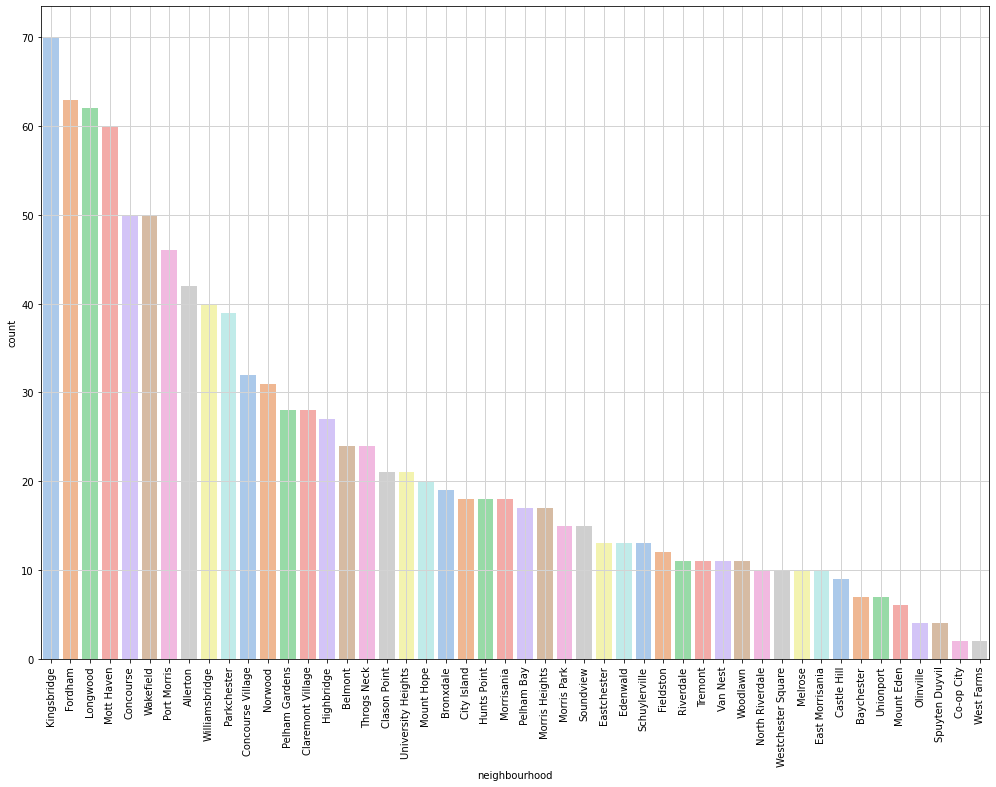

In [37]:
Bronx_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Bronx' ] 
plt.figure(figsize=(17,12))
Bronx_neighbourhood_top10 = Bronx_neighbourhood_top10.sort_values('count' ,ascending= False)
ax = sns.barplot(x="neighbourhood", y="count", data=Bronx_neighbourhood_top10, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()


In [38]:
No_of_Neighbourhood_in_Bronx = len(pd.unique(Bronx_neighbourhood_top10['neighbourhood']))
print(f'No.of.unique neighbourhood in Manhattan  : {No_of_Neighbourhood_in_Bronx}')
print("Top 10 count's in Bronx neighbourhood are:")
Bronx_neighbourhood_top10.head(10)

No.of.unique neighbourhood in Manhattan  : 48
Top 10 count's in Bronx neighbourhood are:


,neighbourhood_group,neighbourhood,count
18,Bronx,Kingsbridge,70
15,Bronx,Fordham,63
19,Bronx,Longwood,62
24,Bronx,Mott Haven,60
9,Bronx,Concourse,50
43,Bronx,Wakefield,50
33,Bronx,Port Morris,46
0,Bronx,Allerton,42
46,Bronx,Williamsbridge,40
30,Bronx,Parkchester,39


In [39]:
#Top 10 Lowest priced Hotels
Price_analysis = airbnb_file.sort_values('price', ascending =False)


In [40]:
#Top 10 Lowest priced Hotels
Price_analysis = Price_analysis[['name','price']]
Price_analysis.tail(10)

,name,price
26259,the best you can find,0
26866,Best Coliving space ever! Shared room.,0
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",0
23161,"Huge Brooklyn Brownstone Living, Close to it all.",0
25794,Spacious comfortable master bedroom with nice ...,0
25778,Modern apartment in the heart of Williamsburg,0
25796,Cozy yet spacious private brownstone bedroom,0
25433,★Hostel Style Room | Ideal Traveling Buddies★,0
26841,Coliving in Brooklyn! Modern design / Shared room,0
25795,Contemporary bedroom in brownstone with nice view,0


In [41]:
Price_analysis_count_checker = airbnb_file[['name','price']].groupby(['price'])['price'].count().reset_index(name='count_of_each_price').sort_values(['price'], ascending=[False])
Price_analysis_count_checker.tail(10)


,price,count_of_each_price
9,20,33
8,19,4
7,18,2
6,16,6
5,15,6
4,13,1
3,12,4
2,11,3
1,10,17
0,0,11


In [42]:
Price_analysis_count_checker.head(10)

,price,count_of_each_price
673,10000,3
672,9999,3
671,8500,1
670,8000,1
669,7703,1
668,7500,2
667,6800,1
666,6500,3
665,6419,1
664,6000,2


In [43]:
Price_analysis_count_checker.shape

(674, 2)

As we know zero can't be the lowest price. there are 11 counts with Zero as the Price. There are few possibilies why we have lowest price as Zero either there is an error while taking up the Error or it's the discounts which is 100% or it's free stay's .But anyway let's Drop Zero Prices. 

In [44]:
Price_analysis_count_checker = Price_analysis_count_checker[Price_analysis_count_checker.price != 0]
Price_analysis_count_checker.tail(10)


,price,count_of_each_price
10,21,6
9,20,33
8,19,4
7,18,2
6,16,6
5,15,6
4,13,1
3,12,4
2,11,3
1,10,17


In [45]:
Price_analysis_count_checker.shape

(673, 2)

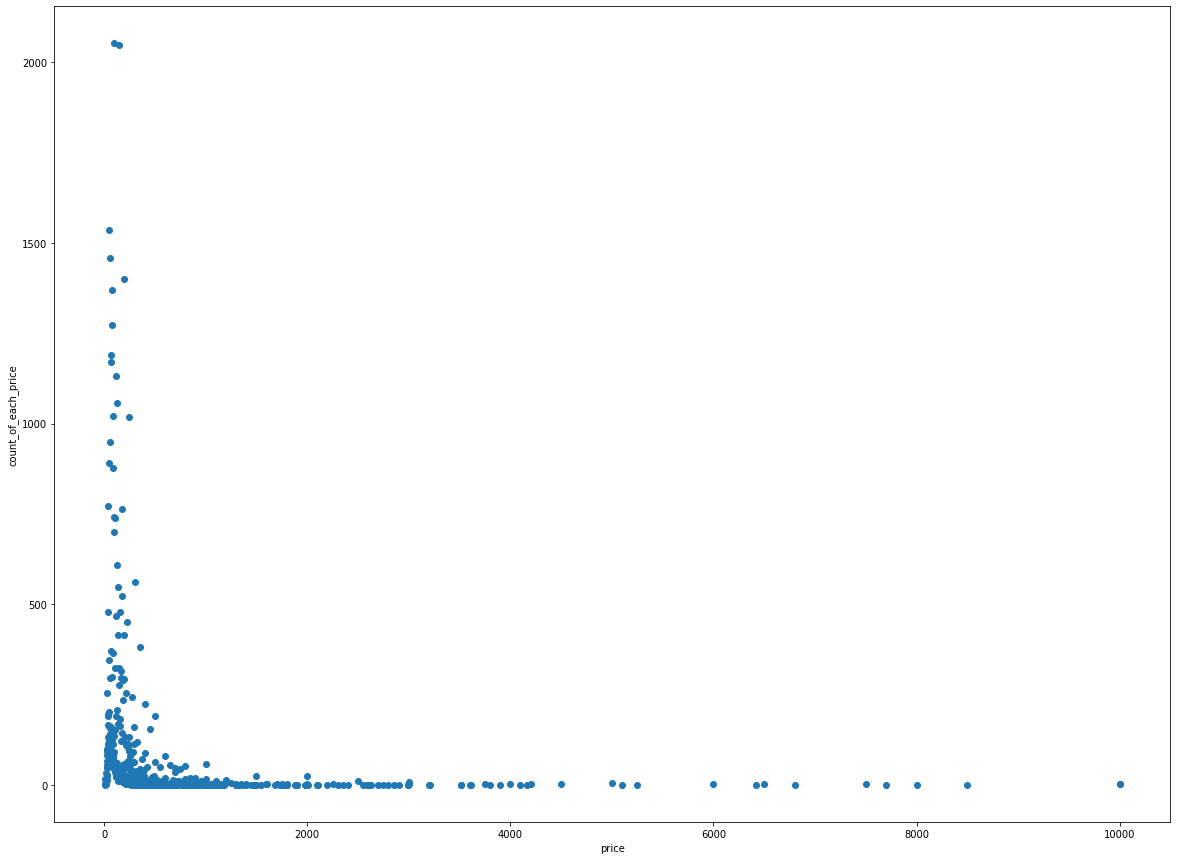

In [46]:
plt.figure(figsize=(20,15))
Price_analysis_count_checker = Price_analysis_count_checker.sort_values('price' ,ascending= False)
gridobj = plt.scatter(x="price", y="count_of_each_price", data=Price_analysis_count_checker)
plt.xlabel("price")
plt.ylabel("count_of_each_price")
plt.show()

In [47]:
Price_analysis_count_checker = Price_analysis_count_checker.sort_values('count_of_each_price' ,ascending= False)
Price_analysis_count_checker.head(10)

,price,count_of_each_price
89,100,2051
139,150,2047
39,50,1534
49,60,1458
189,200,1401
64,75,1370
69,80,1272
54,65,1190
59,70,1170
109,120,1130


The Plot above clearly tells us that even if the prices are high, only few of them have high prices. Most of the Prices fall under 1000 and most common price ranges from 50- 200

In [48]:
no_of_min_nights_counts_checker = airbnb_file[['name','minimum_nights']].groupby(['minimum_nights'])['minimum_nights'].count().reset_index(name='count_of_minium_nights').sort_values(['minimum_nights'], ascending=[False])
no_of_min_nights_counts_checker.tail(10)

,minimum_nights,count_of_minium_nights
9,10,483
8,9,80
7,8,130
6,7,2058
5,6,752
4,5,3034
3,4,3303
2,3,7999
1,2,11696
0,1,12720


In [49]:
no_of_min_nights_counts_checker.head(10)

,minimum_nights,count_of_minium_nights
108,1250,1
107,1000,1
106,999,3
105,500,5
104,480,1
103,400,1
102,370,1
101,366,1
100,365,29
99,364,1


There are 14 host which have minimum night more than 365 days which is more than an year. This values definetly an outlier because minimum nights more than a 200 days defninetly doesn't make practical sense. So let's Drop the values which are more than 180 days. 


In [50]:
no_of_min_nights_counts_checker_filtered = no_of_min_nights_counts_checker[no_of_min_nights_counts_checker['minimum_nights'] <= 200]

In [51]:
no_of_min_nights_counts_checker_filtered.head(10)

,minimum_nights,count_of_minium_nights
86,200,4
85,198,1
84,186,1
83,185,1
82,184,1
81,183,1
80,182,1
79,181,2
78,180,43
77,175,1


In [52]:
no_of_min_nights_counts_checker_filtered.shape

(87, 2)

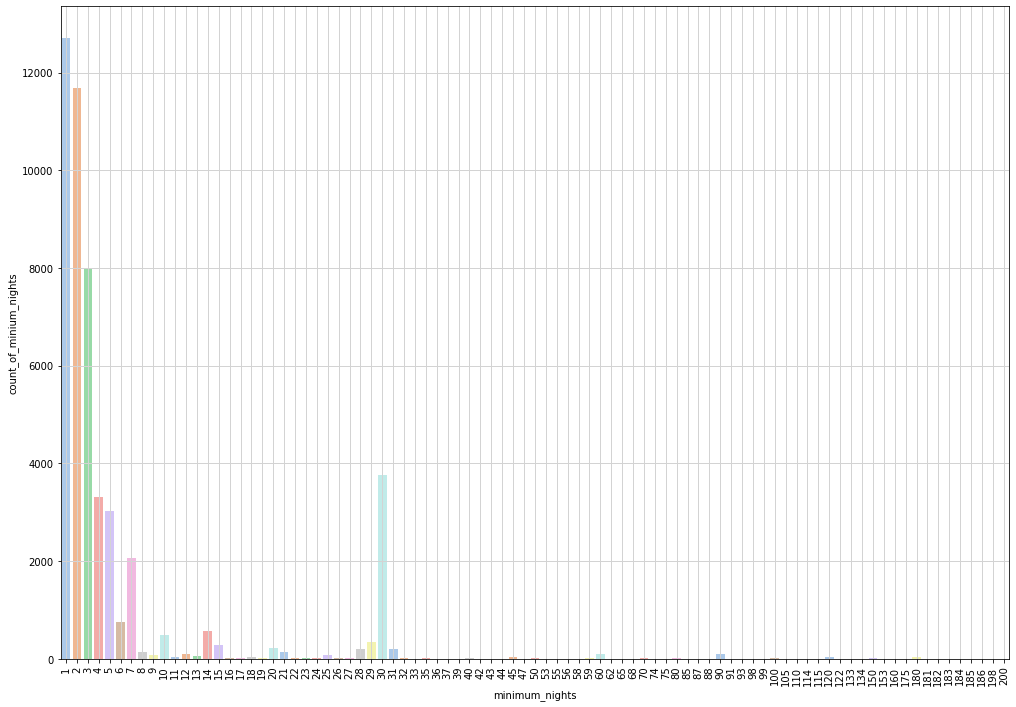

In [53]:
# Bronx_neighbourhood_top10 = multi_group_var.loc[multi_group_var['neighbourhood_group'] == 'Bronx' ] 
plt.figure(figsize=(17,12))
# Bronx_neighbourhood_top10 = Bronx_neighbourhood_top10.sort_values('count' ,ascending= False)
ax = sns.barplot(x="minimum_nights", y="count_of_minium_nights", data=no_of_min_nights_counts_checker_filtered, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

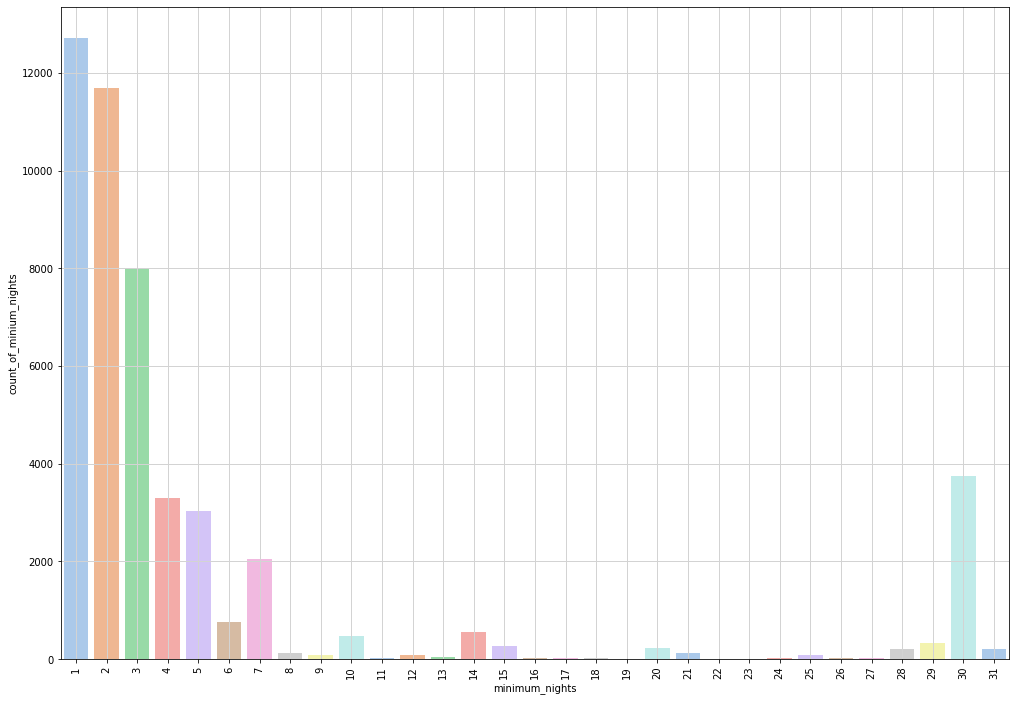

In [54]:
#Let's Consider the bookings for Minimum night only for less than a month
no_of_min_nights_counts_checker_filtered = no_of_min_nights_counts_checker[no_of_min_nights_counts_checker['minimum_nights'] <= 31]

plt.figure(figsize=(17,12))
# Bronx_neighbourhood_top10 = Bronx_neighbourhood_top10.sort_values('count' ,ascending= False)
ax = sns.barplot(x="minimum_nights", y="count_of_minium_nights", data=no_of_min_nights_counts_checker_filtered, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

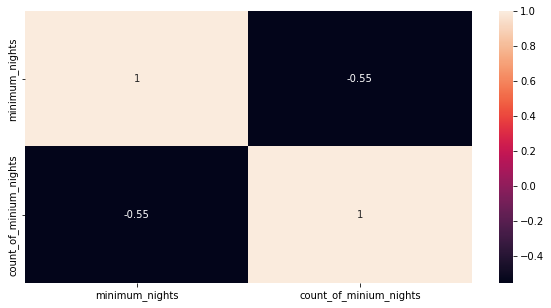

In [55]:
no_of_min_nights_counts_checker_filtered1 = no_of_min_nights_counts_checker_filtered.corr()
plt.figure(figsize=(10,5))
sns.heatmap(no_of_min_nights_counts_checker_filtered1, annot=True)

In [56]:
no_of_min_nights_counts_checker_filtered = no_of_min_nights_counts_checker_filtered.sort_values('count_of_minium_nights' ,ascending= False)
no_of_min_nights_counts_checker_filtered.head(10)

,minimum_nights,count_of_minium_nights
0,1,12720
1,2,11696
2,3,7999
29,30,3760
3,4,3303
4,5,3034
6,7,2058
5,6,752
13,14,562
9,10,483


## The plot and above Dataframe clearly tells more than 90% of the stays offer minium night less than a month and 1 night as minimum night stands on the top


In [57]:
correlations_checker1 = airbnb_file[airbnb_file['minimum_nights'] <= 31]

In [58]:
correlations_checker1 = correlations_checker1[['availability_365','price','number_of_reviews','minimum_nights','reviews_per_month']]

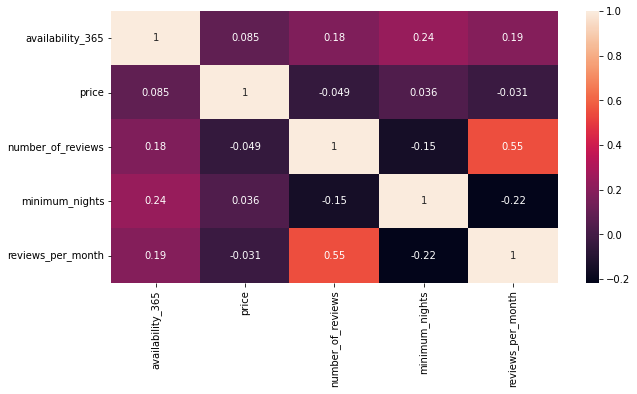

In [59]:
correlations_checker_table1 = correlations_checker1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlations_checker_table1, annot=True)

Correlation increases for availability_365 towards Reviews_per_month, minium_nights, No_of_reviews by decreasing number of Minimum nights 

In [60]:
no_of_min_nights_counts_rooms = airbnb_file[['name','room_type','minimum_nights']].groupby(['room_type','minimum_nights'])['minimum_nights'].count().reset_index(name='count_of_minium_nights').sort_values(['minimum_nights','count_of_minium_nights'], ascending=[False,False])


In [61]:
no_of_min_nights_counts_rooms = no_of_min_nights_counts_rooms[no_of_min_nights_counts_rooms['minimum_nights'] <= 31]
no_of_min_nights_counts_rooms.head(10)

,room_type,minimum_nights,count_of_minium_nights
29,Entire home/apt,31,154
121,Private room,31,43
184,Shared room,31,4
28,Entire home/apt,30,2651
120,Private room,30,1019
183,Shared room,30,90
27,Entire home/apt,29,302
119,Private room,29,38
26,Entire home/apt,28,117
118,Private room,28,86


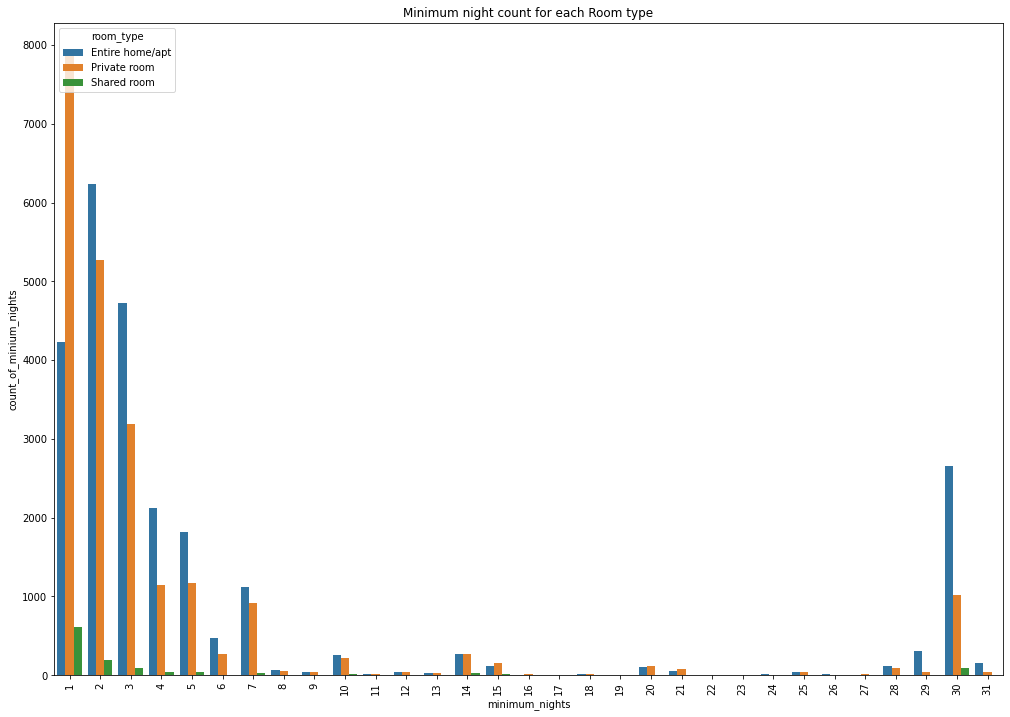

In [62]:
plt.figure(figsize=(17,12))
plt.title("Minimum night count for each Room type")
sns.barplot(x="minimum_nights", y="count_of_minium_nights", data=no_of_min_nights_counts_rooms ,hue=no_of_min_nights_counts_rooms.room_type )
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

In [63]:
availability_counts_checker = airbnb_file[['name','availability_365']].groupby(['availability_365'])['availability_365'].count().reset_index(name='count_of_availability_days').sort_values(['availability_365'], ascending=[False])
availability_counts_checker.head(10)

,availability_365,count_of_availability_days
365,365,1295
364,364,491
363,363,239
362,362,166
361,361,111
360,360,102
359,359,135
358,358,180
357,357,95
356,356,78


In [64]:
availability_counts_checker.tail()

,availability_365,count_of_availability_days
4,4,233
3,3,306
2,2,270
1,1,408
0,0,17533


In [65]:
availability_counts_checker1 = availability_counts_checker[availability_counts_checker['availability_365'] >0]

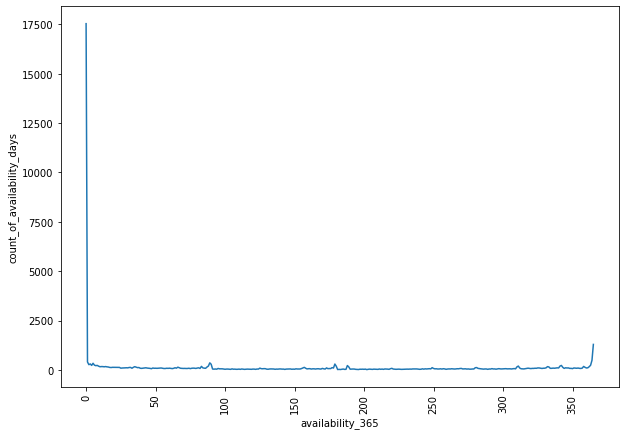

In [66]:
plt.figure(figsize=(10,7))
# Bronx_neighbourhood_top10 = Bronx_neighbourhood_top10.sort_values('count' ,ascending= False)
ax = sns.lineplot(x="availability_365", y="count_of_availability_days", data=availability_counts_checker, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
# ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
# ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

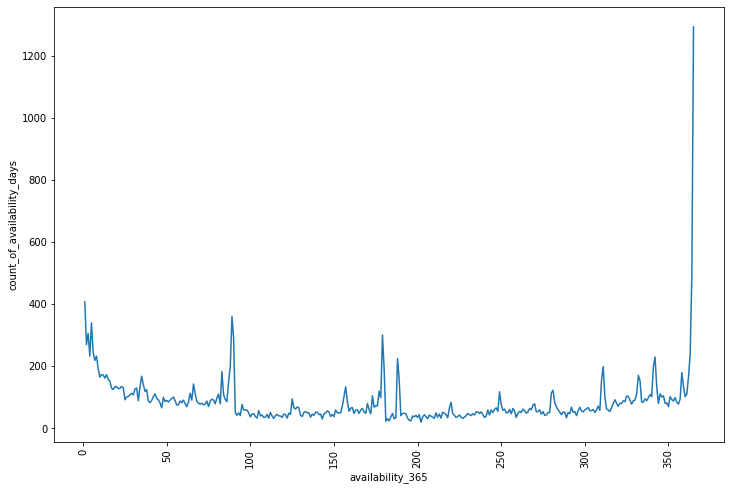

In [67]:
plt.figure(figsize=(12,8))
# Bronx_neighbourhood_top10 = Bronx_neighbourhood_top10.sort_values('count' ,ascending= False)
ax = sns.lineplot(x="availability_365", y="count_of_availability_days", data=availability_counts_checker1, palette=sns.color_palette("pastel", 10))
plt.xticks(rotation='vertical')
# ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
# ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

We have most of our count in Zero it is most probable that all of them with Zero availability are ocasinol Hosts. Maybe they just hostes once. With zero we can't analysis rest of the polt so we drop Zero. In the second plot( I.e with out Zero ) we can clearly see that there is sharp spike once in every ~90 days. This might be due that they are active for Few months and then they take break from Hosting. Finally, We can see there is Sharp rise in plot at 365 days.This shows us that most of the host Do full time business by airbnb. 

#Geo plot

In [84]:
# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
airbnb_file_geo_plot = airbnb_file[(airbnb_file['price'] >= np.percentile(airbnb_file['price'], 0.5)) & 
 (airbnb_file['price'] <= np.percentile(airbnb_file['price'], 99.5))]

In [76]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
street_map = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Projects /Capstone/Data analysis /AirBnb/Borough Boundaries/geo_export_41b44c37-7378-44ab-b93a-acb9c59a86cc.shp')


In [85]:
# designate coordinate system
crs1 = {'init':"EPSG:4326"}
# zip x and y coordinates into single feature 
geometry1 = [Point(xy) for xy in zip(airbnb_file_geo_plot['longitude'], airbnb_file_geo_plot['latitude'])]
# create GeoPandas dataframe
airbnb_file_geo_plot1 = gpd.GeoDataFrame(airbnb_file_geo_plot,crs = crs1,geometry = geometry1)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [86]:
airbnb_file_geo_plot1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)


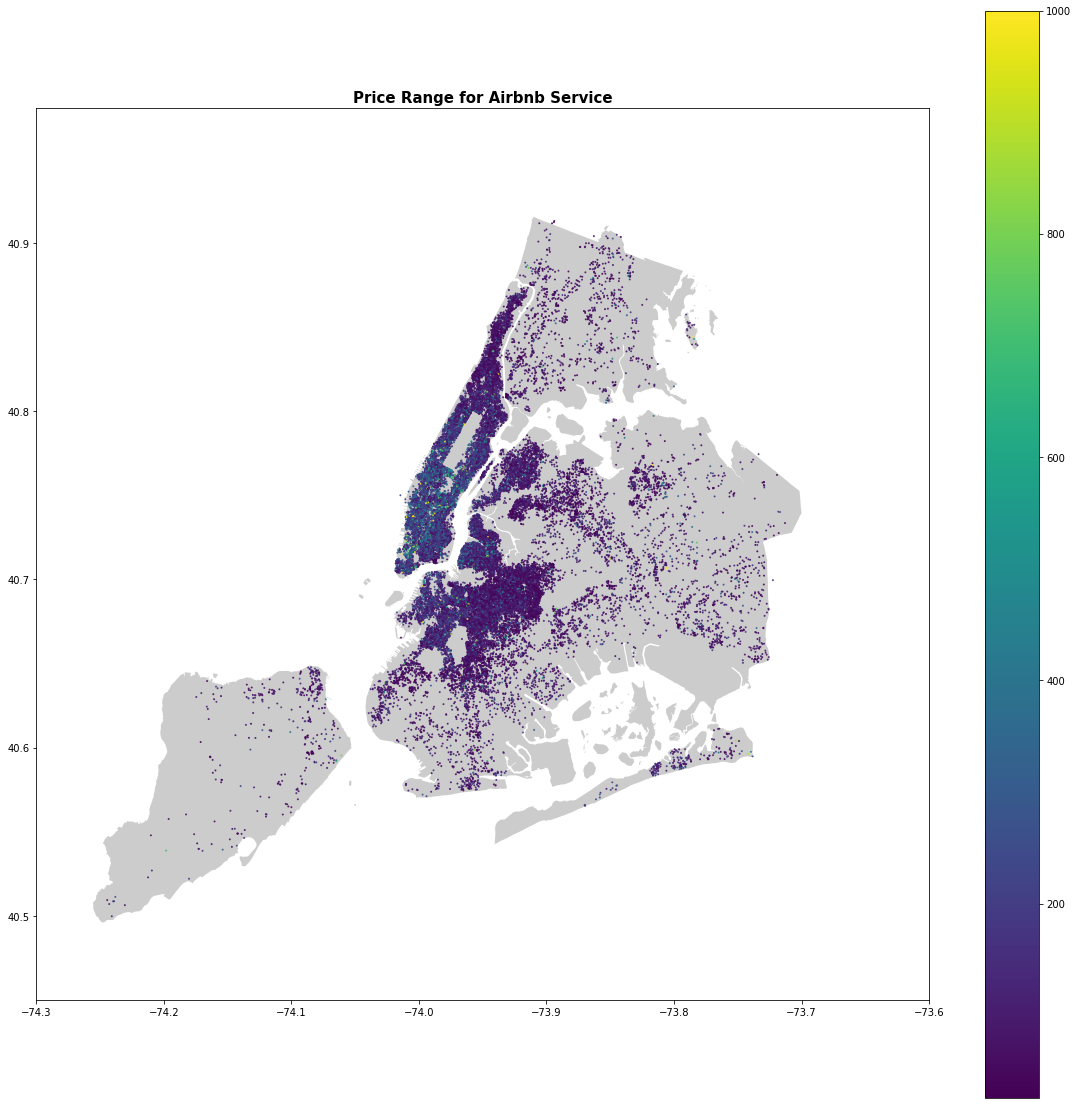

In [107]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20,20))

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')

# add geodataframe to axes, assigning ‘price’ variable to represent coordinates on graph, adding legend, making datapoints transparent using alpha, assigning size of points using markersize
airbnb_file_geo_plot1.plot(column='price',ax=ax,alpha=0.8,legend=True,markersize=1)
# add title to graph
plt.title('Price Range for Airbnb Service', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.3,-73.6)
plt.ylim( 40.45,40.98)
# show map
plt.show()

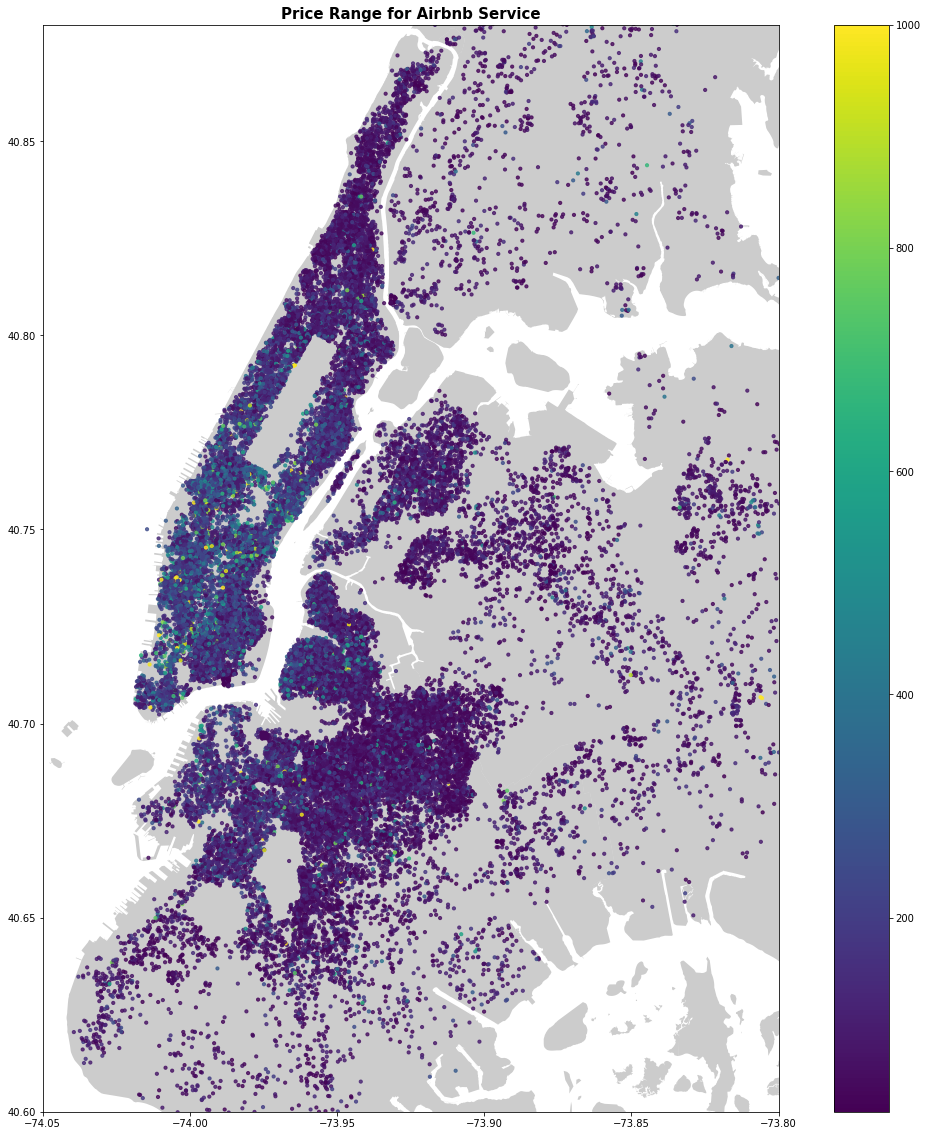

In [110]:
#Let's see only the crowed part with better clarity 
fig, ax = plt.subplots(figsize=(20,20))
street_map.plot(ax=ax, alpha=0.4,color='grey')
airbnb_file_geo_plot1.plot(column='price',ax=ax,alpha=0.8,legend=True,markersize=10)
plt.title('Price Range for Airbnb Service', fontsize=15,fontweight='bold')
plt.xlim(-74.05,-73.8)
plt.ylim( 40.6,40.88)
plt.show()

In [111]:
airbnb_file.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
